In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

In [54]:
df = pd.read_excel('5gene.xlsx')
ge_original = np.array(df)
n = len(ge_original[1])
t = len(ge_original)
CR = 0.5
F = 0.2
ge_original

array([[0.7    , 0.12   , 0.14   , 0.16   , 0.18   ],
       [0.77413, 0.17038, 0.68072, 0.2638 , 0.18058],
       [0.91692, 0.23761, 0.86764, 0.52215, 0.19239],
       [1.03717, 0.32601, 0.93309, 0.79176, 0.23218],
       [1.1009 , 0.42709, 0.96024, 0.98295, 0.30541],
       [1.11553, 0.5277 , 0.97369, 1.08819, 0.40153],
       [1.10067, 0.61786, 0.98137, 1.13338, 0.50515],
       [1.07136, 0.69281, 0.98623, 1.14312, 0.60428],
       [1.03644, 0.75156, 0.98954, 1.13372, 0.69192],
       [1.00064, 0.79529, 0.99191, 1.1149 , 0.76515],
       [0.96636, 0.8261 , 0.99367, 1.09223, 0.82365]])

In [3]:
A =np.array([ 5,10,10,8,10])
B = np.array([ 10,10,10,10,10])
g = np.array([[ 0,0,1,0,-1],
        [2,0,0,0,0],
        [ 0,-1,0,0,0 ],
        [0,0,2,0,-1],
        [0,0,0,2,0]])
h= np.array([[2,0,0,0,0],
        [0,2,0,0,0],
        [0,-1,2,0,0],
        [ 0,0,0,2,0],
        [ 0,0,0,0,2]])

In [104]:
def calc_dydt(alpha, beta, g, h, exp ):
    
    #exp is the gene expression of the previous time step
    
    
    #print(alpha,'*',exp[0]**g[0],'*',exp[1]**g[1],'*',exp[2]**g[2],'*',exp[3]**g[3],'*',exp[4],"^",g[4])
    #print(exp[4],"^",g[4],"=",exp[4]**g[4])
    
    Generation = alpha * (np.prod(pow(exp,g)))
    Degeneration = beta* (np.prod(pow(exp,h)))
    return (Generation-Degeneration)
    
def calc_ge(p):
    #p --> learning parameters as a dictionary 
    
    #t -->is the length of time stamp
    #n --> number of Genes
    #init--> gene expression for time step 1
    
    original = ge_original.copy()
    ge_calc = [original[0]]
    H=0.01
    
    
    for i in range(t):

        
        single_exp=[]
        
        
        for j in range(n):
            
            
            #print(original[i][j])
            
            ge_temp = ge_calc[i].copy()
            
            #ge_temp = ge_original[i].copy()
            
            #print("for Gene ", j)
            value = ge_calc[i][j].copy()
            #ge_temp[j]=value
            
            #print(ge_temp==ge_original[i])
            
            k1 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp)
            #print(h)
            #print(ge_temp+k1*H*0.5)
            k2 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(H*0.5*k1))
            k3 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(H*0.5*k2))
            k4 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(k3*H))
            
            next_step = value + ((1/6)*(k1+2*k2+2*k3+k4)*H)
            #next_step = value + (k1*H)

           
            
            
            
            
            
            single_exp.append(next_step)
            
        ge_calc.append(single_exp)
    
    return(np.array(ge_calc))
     


In [35]:
ge_calculated = calc_ge(random_population())
ge_calculated

array([[0.7       , 0.12      , 0.14      , 0.16      , 0.18      ],
       [0.69026002, 0.17042823, 0.50674731, 0.16628756, 0.17932136],
       [0.76266485, 0.21757804, 0.73069973, 0.26993861, 0.17887149],
       [0.86466845, 0.274031  , 0.85732003, 0.45811085, 0.18299612],
       [0.97060502, 0.34542027, 0.92252086, 0.68295704, 0.20112818],
       [1.0608906 , 0.43306102, 0.9545811 , 0.89692393, 0.24584596],
       [1.11910986, 0.53299864, 0.97087042, 1.062269  , 0.32531053],
       [1.13781598, 0.63573426, 0.97982501, 1.16032864, 0.43548932],
       [1.12366113, 0.72940526, 0.98520944, 1.1968484 , 0.55996462],
       [1.09047497, 0.80542105, 0.98872859, 1.19271436, 0.67929139]])

In [40]:
#Initialization of the population

def random_population():
    learning_parameters = {'A': np.random.randint(low=0, high=20, size=(n,)), 
                           'B': np.random.randint(low=0, high=20, size=(n,)), 
                           'g': np.random.randint(low=-3, high=3, size=(n,n)),
                           'h': np.random.randint(low=-3, high=3, size=(n,n))}
    
    for i in range(n):
        zero_parameters = GetRandomLocations()
        for j in zero_parameters:
            learning_parameters['g'][i][j]=0
        zero_parameters = GetRandomLocations()
        for k in zero_parameters:
            learning_parameters['h'][i][k]=0
            
            
    return learning_parameters


def GetRandomLocations():
    values = []
    while(len(values)<3):
        value = np.random.randint(low=0, high=5)
        if(value not in values):
            values.append(value)
    return(values)

In [89]:
def rand(l,h,shape):
    return(np.random.uniform(low=l, high=h, size=shape))
#mutation function 
def mutation(l,h,i):
    
    r1 = rand(l,h,i.shape)
    r2 = rand(l,h,i.shape)
    r3 = rand(l,h,i.shape)
    return(r1+F*(r2-r3))

In [37]:
def checkBounds(parameters, low, high ):
    while((parameters<low).any() or (parameters>high).any()):
        InBounds=[]
        for x in np.nditer(parameters):
            if(x<low):
                InBounds.append(2*low-x)
            elif(x>high):
                InBounds.append(2*high-x)
            else:
                InBounds.append(x)
        parameters = np.array(InBounds).reshape(parameters.shape)
        #print(parameters)
    
    return(parameters)

In [38]:

def crossover(g_mutant,g_target):
    
    temp = np.empty(g_target.shape)
    j_rand = np.random.randint(0,len(g_target))
    j = rand(0,1,g_target.shape)
    i = 0
    for x,y,z,t in zip(np.nditer(j),np.nditer(g_mutant),np.nditer(g_target),np.nditer(temp)):
        if(x<=CR or x==j_rand):
            t =y
        elif(x>CR and x!=j_rand):
            t =z
    #print("===================g_mutant===b=========",temp)
    return(g_mutant)       
            

In [85]:
#selecting the best generation

def selection(fitness_new, fitness_old,g_new,g_old):
    #we assume that old generation is the best
    g_temp=g_old.copy()
    if(fitness_old<fitness_new):
        g_temp = g_old.copy()    
    elif(fitness_old>=fitness_new):
        g_temp=g_new.copy()
    
    if(np.isnan(fitness_old) and np.isnan(fitness_old)):
        g_temp=g_new.copy()
        
        
    ##print(g_temp)

    return(g_temp)

In [62]:
def fitness(CG,RG):
    fit = ((CG-RG)/RG)**2
    return(np.sum((np.sum(fit, axis=0))))

In [52]:
def next_generation(g):
    #calling mutation
    g_mutant = dict()
    g_mutant['A']=mutation(0,20,g['A']).copy()
    g_mutant['B']=mutation(0,20,g['B']).copy()
    g_mutant['g']=mutation(-3,3,g['g']).copy()
    g_mutant['h']=mutation(-3,3,g['h']).copy()
    
    for i in range(n):
        zero_parameters = GetRandomLocations()
        for j in zero_parameters:
            g_mutant['g'][i][j]=0
        zero_parameters = GetRandomLocations()
        for k in zero_parameters:
            g_mutant['h'][i][k]=0

    #calling crossover
    g_trial = dict()
    g_trial['A'] = crossover(g_mutant['A'],g['A']).copy()
    g_trial['B'] = crossover(g_mutant['B'],g['B']).copy()
    g_trial['g'] = crossover(g_mutant['g'],g['g']).copy()
    g_trial['h'] = crossover(g_mutant['h'],g['h']).copy()
    
    g_trial['A'] = checkBounds(g_trial['A'], 0, 20).copy()
    g_trial['B'] = checkBounds(g_trial['B'], 0, 20).copy()
    g_trial['g'] = checkBounds(g_trial['g'], -3, 3).copy()
    g_trial['h'] = checkBounds(g_trial['h'], -3, 3).copy()
    
    
        
    return(g_trial)

In [55]:
def save_values(l):
    all_values.append(l)
    

def get_full_set(x):
    
    #get the gene expressions
    exp = calc_ge(x)
    #get fitness function 
    fit = fitness(exp,ge_original)
    
    #return function, fitness and gene expression
    return([x,exp,fit])

In [90]:
#Main method running all the operations 

G=0
g = random_population()

all_values = []
start = time.time()
best_low=[1,1,np.array(16)]#initializing the worst fitness
temp=0

while(best_low[2]>1 or np.isnan(best_low[2])):
    
    #Saving expression and fitness for respective generation
    save_values(get_full_set(g))
    
    #getting the next generation
    new_g = next_generation(g)
    #print("=================================================================================")
    #for x in range(temp):
        #print(all_values[x][0])
    #print("==================================================================================")
    
    #getting the expression and fitness for next generation 
    full_set = get_full_set(new_g)
    
    
    
    best_low = all_values[len(all_values)-1].copy()
    
    #selection the btetter generation
    g = selection(full_set[2], best_low[2],full_set[0],best_low[0]).copy()  

    #print(g)
    
    #printing the generation and fitness value whenever it changes
    if(len(all_values)>1):
        old_fitness = all_values[len(all_values)-2][2].copy()
        new_fitness = all_values[len(all_values)-1][2].copy()
        if(old_fitness!=new_fitness):
            print('Generation No:', len(all_values)+1) 
            print("Fitness:",new_fitness)   
    temp=temp+1            

            
#printing outcome            
total_time_taken = (time.time()-start)
G += len(all_values)
print('number of Generation:', G)
print('best_fitness:', best_low[2])
print('total time taken:', total_time_taken)

<ipython-input-51-3db4d534c8e2>:10: RuntimeWarning: overflow encountered in power
  Degeneration = beta* (np.prod(pow(exp,h)))
<ipython-input-51-3db4d534c8e2>:49: RuntimeWarning: invalid value encountered in add
  k2 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(H*0.5*k1))
<ipython-input-51-3db4d534c8e2>:9: RuntimeWarning: invalid value encountered in power
  Generation = alpha * (np.prod(pow(exp,g)))
<ipython-input-51-3db4d534c8e2>:10: RuntimeWarning: invalid value encountered in power
  Degeneration = beta* (np.prod(pow(exp,h)))


Generation No: 3
Fitness: nan
Generation No: 4
Fitness: nan
Generation No: 5
Fitness: nan
Generation No: 6
Fitness: nan
Generation No: 7
Fitness: nan
Generation No: 8
Fitness: nan
Generation No: 9
Fitness: nan
Generation No: 10
Fitness: nan
Generation No: 11
Fitness: nan
Generation No: 12
Fitness: nan
Generation No: 13
Fitness: nan
Generation No: 14
Fitness: nan
Generation No: 15
Fitness: nan
Generation No: 16
Fitness: nan
Generation No: 17
Fitness: nan
Generation No: 18
Fitness: nan
Generation No: 19
Fitness: nan
Generation No: 20
Fitness: nan
Generation No: 21
Fitness: nan
Generation No: 22
Fitness: nan
Generation No: 23
Fitness: nan
Generation No: 24
Fitness: nan
Generation No: 25
Fitness: nan
Generation No: 26
Fitness: nan
Generation No: 27
Fitness: nan
Generation No: 28
Fitness: nan
Generation No: 29
Fitness: nan
Generation No: 30
Fitness: nan
Generation No: 31
Fitness: nan
Generation No: 32
Fitness: nan
Generation No: 33
Fitness: nan
Generation No: 34
Fitness: nan
Generation No: 

<ipython-input-62-3bb1e0da9c6f>:2: RuntimeWarning: overflow encountered in square
  fit = ((CG-RG)/RG)**2


 86
Fitness: nan
Generation No: 87
Fitness: nan
Generation No: 88
Fitness: nan
Generation No: 89
Fitness: nan
Generation No: 90
Fitness: nan
Generation No: 91
Fitness: nan
Generation No: 92
Fitness: nan
Generation No: 93
Fitness: nan
Generation No: 94
Fitness: nan
Generation No: 95
Fitness: nan
Generation No: 96
Fitness: nan
Generation No: 97
Fitness: nan
Generation No: 98
Fitness: nan
Generation No: 99
Fitness: nan
Generation No: 100
Fitness: nan
Generation No: 101
Fitness: nan
Generation No: 102
Fitness: nan
Generation No: 103
Fitness: nan
Generation No: 104
Fitness: nan
Generation No: 105
Fitness: nan
Generation No: 106
Fitness: nan
Generation No: 107
Fitness: nan
Generation No: 108
Fitness: nan
Generation No: 109
Fitness: nan
Generation No: 110
Fitness: nan
Generation No: 111
Fitness: nan
Generation No: 112
Fitness: nan
Generation No: 113
Fitness: nan
Generation No: 114
Fitness: nan
Generation No: 115
Fitness: nan
Generation No: 116
Fitness: nan
Generation No: 117
Fitness: nan
Gene

<ipython-input-51-3db4d534c8e2>:9: RuntimeWarning: overflow encountered in power
  Generation = alpha * (np.prod(pow(exp,g)))
<ipython-input-51-3db4d534c8e2>:11: RuntimeWarning: invalid value encountered in double_scalars
  return (Generation-Degeneration)


Generation No: 2062
Fitness: 13.040374220798975
Generation No: 2273
Fitness: 12.412424901374997
Generation No: 7108
Fitness: 4.737859636992785


<ipython-input-51-3db4d534c8e2>:10: RuntimeWarning: overflow encountered in double_scalars
  Degeneration = beta* (np.prod(pow(exp,h)))


Generation No: 75169
Fitness: 4.427997394193016


<ipython-input-51-3db4d534c8e2>:9: RuntimeWarning: overflow encountered in double_scalars
  Generation = alpha * (np.prod(pow(exp,g)))


Generation No: 240142
Fitness: 2.3434500060695864


<ipython-input-51-3db4d534c8e2>:50: RuntimeWarning: invalid value encountered in add
  k3 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(H*0.5*k2))
<ipython-input-51-3db4d534c8e2>:51: RuntimeWarning: invalid value encountered in add
  k4 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(k3*H))
<ipython-input-51-3db4d534c8e2>:53: RuntimeWarning: overflow encountered in double_scalars
  next_step = value + ((1/6)*(k1+2*k2+2*k3+k4)*H)


KeyboardInterrupt: 

In [120]:
total_time_taken = (time.time()-start)
G += len(all_values)
print('number of Generation:', G)
print('best_fitness:', best_low[2])
print('total time taken:', total_time_taken/(60*60)," hours")

number of Generation: 18370360
best_fitness: 2.3434500060695864
total time taken: 12.03627776801586  hours


In [92]:

from datetime import date

today = date.today()

Text = "CANONICAL S SYSTEM EQN"+"\n"+str(today)+'\n'+'CR= '+str(CR)+'\n'+'F= '+str(F)+'\n'+'G='+str(G)+'\n'+'parameters'+'\n'+str(best_low[0])+'\n'+'calculated gene expreesions'+'\n'+str(best_low[1])+'\n'+'fitness function'+str(best_low[2])+'\n'+'time taken:'+str(total_time_taken/60)+' inutes'


fileName = "Results"+str(today)
with open(fileName, 'w') as out_file:
    out_file.write(Text)   


In [113]:
org = ge_original
ts = np.array([x/10 for x in range(11)]) #number of time points
ge_calculated = best_low[1]
len(ge_calculated)

11

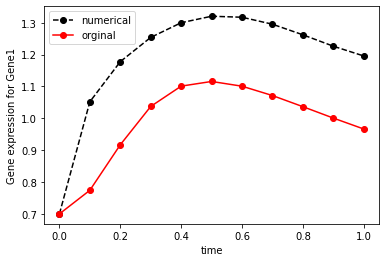

In [114]:
plt.plot(ts, ge_calculated[:,0], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, org[:,0], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

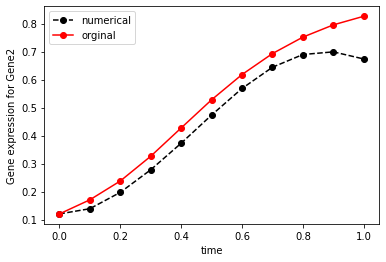

In [115]:
plt.plot(ts, ge_calculated[:,1], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, org[:,1], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene2')
plt.legend(('numerical','orginal'))
plt.show()

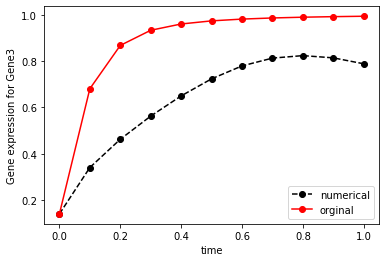

In [116]:
 plt.plot(ts, ge_calculated[:,2], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, org[:,2], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene3')
plt.legend(('numerical','orginal'))
plt.show()

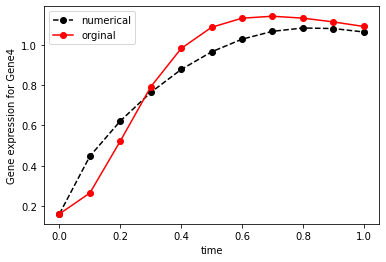

In [117]:
plt.plot(ts, ge_calculated[:,3], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, org[:,3], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene4')
plt.legend(('numerical','orginal'))
plt.show()

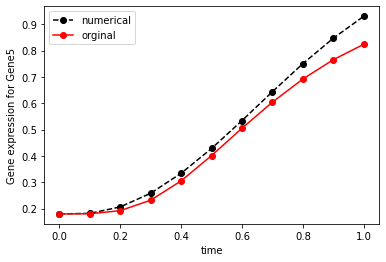

In [118]:
plt.plot(ts, ge_calculated[:,4], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, org[:,4], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene5')
plt.legend(('numerical','orginal'))
plt.show()